# **Setting up the environment**

In [71]:
import pandas as pd
import numpy as np


In [72]:
data = pd.read_csv(r"C:\Users\panda\Desktop\my machine learning docs\flipkart\Dataset-SA.csv")
df = pd.DataFrame(data)

# **Exploratory Data Analysis**

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51349 entries, 0 to 51348
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   51349 non-null  object
 1   product_price  51349 non-null  object
 2   Rate           51349 non-null  object
 3   Review         41625 non-null  object
 4   Summary        51342 non-null  object
 5   Sentiment      51349 non-null  object
dtypes: object(6)
memory usage: 2.4+ MB


In [74]:
data.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,51349,51349,51349,41625,51342,51349
unique,295,225,6,409,25339,3
top,Lakm?? Eyeconic Kajal Twin Pack??????(Deep Bla...,449,5,wonderful,good,positive
freq,1999,2841,29399,2163,4234,41769


In [75]:
data.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [76]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

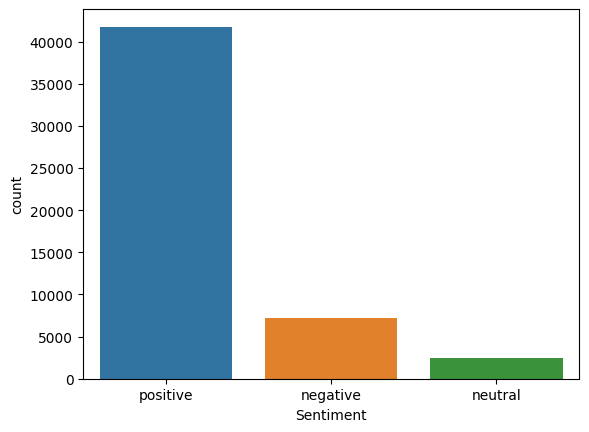

In [77]:
ax = sn.countplot(x='Sentiment',data=data)


In [78]:
#from sklearn.model_selection import train_test_split
#train_set , test_set = train_test_split(data , test_size=0.2,random_state=42)

In [79]:
data = data[data.Sentiment.isin(['neutral']) == False]
df = pd.DataFrame(data)

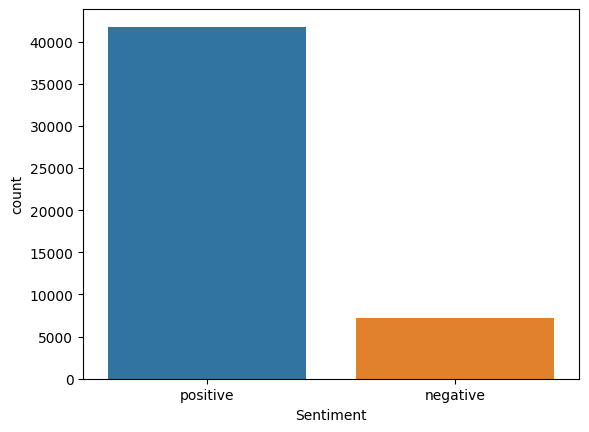

In [80]:
ax = sn.countplot(x='Sentiment',data=data)


In [81]:
data['Sentiment'].value_counts()

positive    41769
negative     7165
Name: Sentiment, dtype: int64

In [82]:
df = df.fillna(df.mode().iloc[0])
df.head()


,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive


In [83]:
data = df
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48934 entries, 0 to 51348
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   48934 non-null  object
 1   product_price  48934 non-null  object
 2   Rate           48934 non-null  object
 3   Review         48934 non-null  object
 4   Summary        48934 non-null  object
 5   Sentiment      48934 non-null  object
dtypes: object(6)
memory usage: 2.6+ MB


# **Feature Transformations**

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
feature_vector = count_vectorizer.fit(data.Review)
features = feature_vector.get_feature_names_out()
print("Total number of features: ",len(features))

Total number of features:  524


In [85]:
data_features = count_vectorizer.transform(data.Review)

In [86]:
data_features.shape

(48934, 524)

In [87]:
data_features.getnnz()

87296

In [88]:
print("Density of the matrix: ",
    data_features.getnnz()*100 /  
    (data_features.shape[0]* data_features.shape[1]))


Density of the matrix:  0.34044921700112035


In [89]:
data_df = pd.DataFrame(data_features.todense())
data_df.columns = features

In [90]:
data[0:1]

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive


In [91]:
data_df.iloc[:1,150:157]

,doubtful,drive,dslr,dulcet,durable,earlier,easy
0,0,0,0,0,0,0,0


In [92]:
features_counts = np.sum(data_features.toarray(), axis = 0)
features_counts_df = pd.DataFrame(dict(features = features , counts = features_counts))

Text(0, 0.5, 'Density')

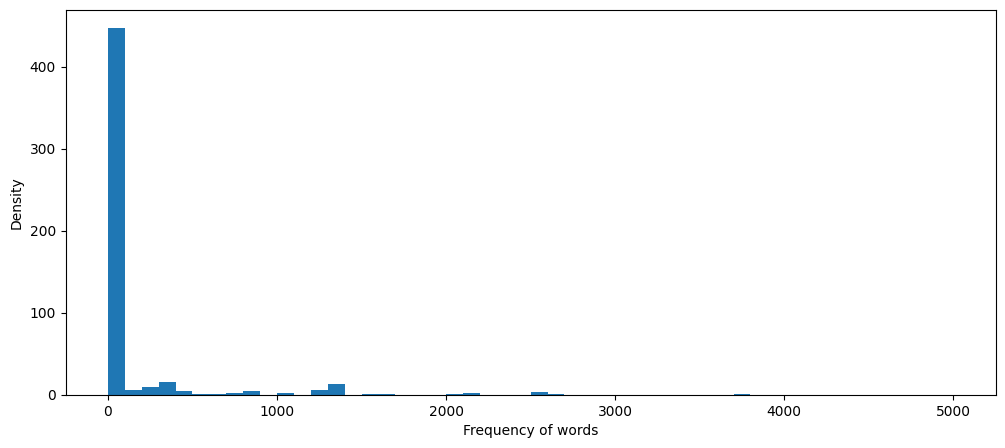

In [93]:
plt.figure(figsize=(12,5))
plt.hist(features_counts_df.counts , bins=50 , range = (0 ,5000))
plt.xlabel('Frequency of words')
plt.ylabel('Density')

In [94]:
len(features_counts_df[features_counts_df.counts == 1])


275

In [95]:
count_vectorizer = CountVectorizer(max_features=10000)
feature_vector = count_vectorizer.fit(data.Review)
features = feature_vector.get_feature_names_out()
data_features = count_vectorizer.transform(data.Review)
features_counts = np.sum(data_features.toarray() , axis = 0)
feature_counts = pd.DataFrame(dict(features = features , counts = features_counts))

In [96]:
feature_counts.sort_values('counts',ascending = False)[0:15]

,features,counts
510,wonderful,11243
373,product,6839
217,good,3777
45,awesome,2690
375,purchase,2599
450,terrific,2554
455,the,2543
320,money,2195
516,worth,2110
331,nice,2061


In [97]:

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

english_stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
data['Review'][0:5]

0             super!
1            awesome
2               fair
3    useless product
5            awesome
Name: Review, dtype: object

In [99]:
count_vectorizer = CountVectorizer(stop_words=english_stop_words , max_features = 10000)
feature_vector = count_vectorizer.fit(data.Review)
data_features = count_vectorizer.transform(data.Review)
features = feature_vector.get_feature_names_out()
features_counts = np.sum(data_features.toarray() , axis=0)
feature_counts = pd.DataFrame(dict(features = features , counts = features_counts))


In [100]:
feature_counts.sort_values("counts",ascending = False)[0:15]

,features,counts
448,wonderful,11243
333,product,6839
198,good,3777
37,awesome,2690
335,purchase,2599
406,terrific,2554
292,money,2195
454,worth,2110
301,nice,2061
344,recommended,1552


In [101]:
from nltk.stem.snowball import PorterStemmer
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
  stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
  non_stop_words = [word for word in stemmed_words ]
  return non_stop_words

In [102]:
count_vectorizer = CountVectorizer(analyzer = stemmed_words , max_features = 10000)
feature_vector = count_vectorizer.fit(data.Review)
data_features = count_vectorizer.transform(data.Review)
features = feature_vector.get_feature_names_out()
features_counts = np.sum(data_features.toarray() , axis=0)
feature_counts = pd.DataFrame(dict(features = features , counts = features_counts))


In [103]:
feature_counts.sort_values("counts",ascending = False)[0:15]

,features,counts
484,wonder,11243
353,product,6839
204,good,3777
44,awesom,2690
355,purchas,2599
427,terrif,2554
431,the,2543
301,money,2195
488,worth,2110
312,nice,2061


In [104]:
data_df = pd.DataFrame(data_features.todense())
data_df.columns = features
data_df['Sentiment'] = data.Sentiment

# **Model training and analysis**

In [105]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(data_features,data.Sentiment,test_size=0.2,random_state=42)

In [106]:
from sklearn.naive_bayes import BernoulliNB
nb_clf1 = BernoulliNB()
nb_clf1.fit(X_train.toarray(),Y_train)

BernoulliNB()

In [107]:
test_predicted = nb_clf1.predict(X_test.toarray())

In [108]:
from sklearn import metrics
print(metrics.classification_report(Y_test,test_predicted))

              precision    recall  f1-score   support

    negative       0.88      0.68      0.77      1438
    positive       0.95      0.98      0.97      8349

    accuracy                           0.94      9787
   macro avg       0.91      0.83      0.87      9787
weighted avg       0.94      0.94      0.94      9787



<Axes: >

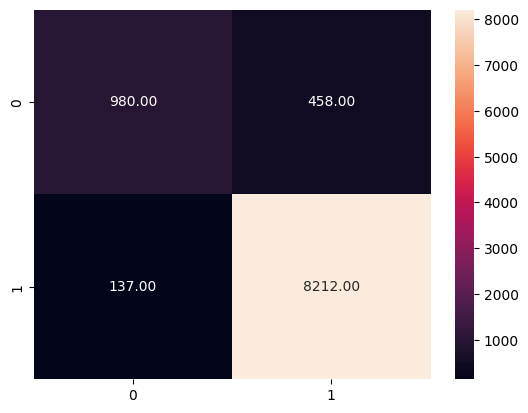

In [109]:
cm = metrics.confusion_matrix(Y_test,test_predicted)
sn.heatmap(cm, annot=True , fmt='.2f')

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(analyzer = stemmed_words , max_features = 10000)
feature_vector = tfidf_vectorizer.fit(data.Review)
data_features = tfidf_vectorizer.transform(data.Review)
features = feature_vector.get_feature_names_out()


In [111]:
from sklearn.metrics import accuracy_score

In [112]:
print('Accuracy of the model: {0}%'.format(accuracy_score(Y_test,test_predicted)*100))

Accuracy of the model: 93.9205067947277%


In [113]:

from sklearn.naive_bayes import GaussianNB
X_train , X_test , Y_train , Y_test = train_test_split(data_features,data.Sentiment,test_size=0.2,random_state=42)


In [114]:
nb_clf2 = GaussianNB()
nb_clf2.fit(X_train.toarray(),Y_train)

GaussianNB()

In [115]:
test_predicted = nb_clf2.predict(X_test.toarray())

In [116]:
from sklearn import metrics
print(metrics.classification_report(Y_test,test_predicted))

              precision    recall  f1-score   support

    negative       0.15      1.00      0.26      1438
    positive       0.98      0.04      0.07      8349

    accuracy                           0.18      9787
   macro avg       0.57      0.52      0.17      9787
weighted avg       0.86      0.18      0.10      9787



<Axes: >

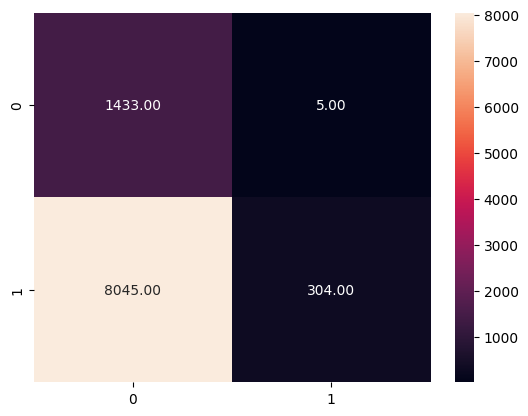

In [117]:
cm = metrics.confusion_matrix(Y_test,test_predicted)
sn.heatmap(cm, annot=True , fmt='.2f')

In [118]:
print('Accuracy of the model: {0}%'.format(accuracy_score(Y_test,test_predicted)*100))

Accuracy of the model: 17.74803310513947%


In [119]:
from nltk.stem import PorterStemmer
import re
stemmer = PorterStemmer()
def get_stemmed_tokens(doc):
  all_tokens = [word for word in nltk.word_tokenize(doc)]
  clean_tokens=[]
  for each_token in all_tokens:
    if re.search('[a-zA-Z]',each_token):
        clean_tokens.append(each_token)
  stemmed_tokens = [stemmer.stem(t) for t in clean_tokens]
  return stemmed_tokens

In [120]:
tfidf_vectorizer = TfidfVectorizer(stop_words ='english' , max_features = 10000 , tokenizer=get_stemmed_tokens , ngram_range=(1,2))
feature_vector = tfidf_vectorizer.fit(data.Review)
data_features = tfidf_vectorizer.transform(data.Review)
features = feature_vector.get_feature_names_out()

C:\Users\panda\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\panda\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'there

In [121]:
X_train , X_test , Y_train , Y_test = train_test_split(data_features,data.Sentiment,test_size=0.2,random_state=42)
nb_clf3 = BernoulliNB()
nb_clf3.fit(X_train.toarray(),Y_train)
test_predicted = nb_clf3.predict(X_test.toarray())
print(metrics.classification_report(Y_test,test_predicted))

              precision    recall  f1-score   support

    negative       0.87      0.63      0.73      1438
    positive       0.94      0.98      0.96      8349

    accuracy                           0.93      9787
   macro avg       0.90      0.80      0.84      9787
weighted avg       0.93      0.93      0.93      9787



<Axes: >

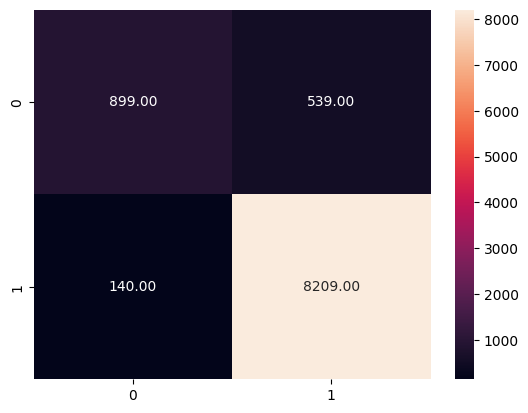

In [122]:
cm = metrics.confusion_matrix(Y_test,test_predicted)
sn.heatmap(cm, annot=True , fmt='.2f')

In [123]:
print('Accuracy of the model: {0}%'.format(accuracy_score(Y_test,test_predicted)*100))

Accuracy of the model: 93.0622254010422%


# **Predictions**

In [124]:
x = tfidf_vectorizer.transform(['I am a good boy'])
nb_clf3.predict(x)

array(['positive'], dtype='<U8')